# TEST 4 - full grid using my composition

This notebook is only for the colour maps

This is the same as in TEST 1 but for the whole grid. Now we are using the formula for the Y fraction.
In this test I include h2 and he3, use the tau100 tables and explore the following parameters:
- \[Fe/H\] = -0.5, 0, 0.3
- $\alpha_{MLT}$ = 1.0, 1.6, 1.82
- masses = (0.1, 0.6) in steps of 0.05

In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt

# Colour map for the masses

In [2]:
%matplotlib ipympl

In [3]:
# Define the parameters
masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6] 
alphas = [1.0, 1.6, 1.82]
metallicities = [0.0045, 0.0142, 0.028]

# Base path
base_path = 'test2_grid_deuterium_tau100/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and its mass to the list
                mesa_data_list.append((mesa_data_instance, mass))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")
                
# The try is to check which models were not computed correctly in MESA

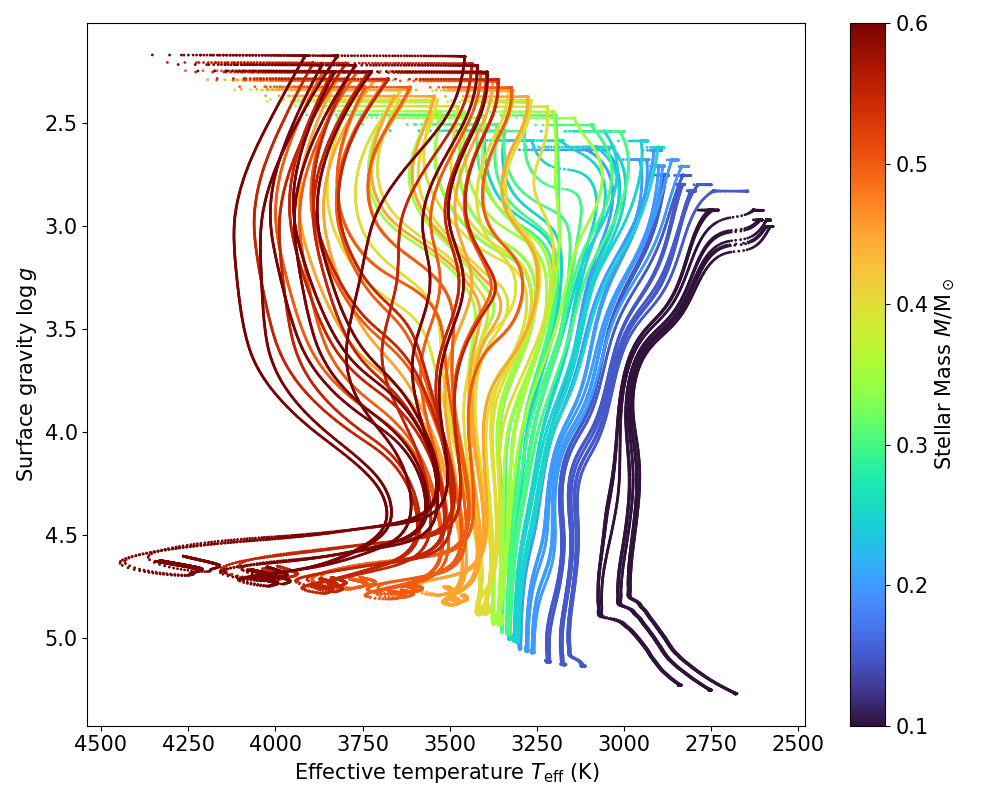

In [4]:
# Initialize lists to store Teff and log_g values
teff_values = []
log_g_values = []
mass_values = []

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass in mesa_data_list:
    # Access Teff and log_g attributes
    teff = mesa_data.Teff
    log_g = mesa_data.log_g
    
    # Append values to lists
    teff_values.append(teff)
    log_g_values.append(log_g)
    mass_values.append(mass * np.ones_like(teff))  # Create an array of the same length as teff

# Flatten the lists of values
teff_values_flat = np.concatenate(teff_values)
log_g_values_flat = np.concatenate(log_g_values)
mass_values_flat = np.concatenate(mass_values)

# Plot Teff vs log_g with colormap based on mass_values
plt.figure(figsize=(10, 8))

# Scatter plot 
sc = plt.scatter(teff_values_flat, log_g_values_flat, c=mass_values_flat, cmap='turbo', alpha=1, s=1)

# Create a colorbar
cbar = plt.colorbar(sc)
cbar.set_label(r'Stellar Mass $M$/$\text{M}_\odot$', fontsize=15) 

# Set the fontsize for colorbar ticks
cbar.ax.tick_params(labelsize=15)

plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)
plt.ylabel(r'Surface gravity $\log g$', fontsize=15)

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 

plt.gca().invert_xaxis()  # Invert x axis (Teff)
plt.gca().invert_yaxis()  # Invert y axis (log g)

plt.savefig('colour_map_masses.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()